In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image
import scipy.io
import pandas as pd
from IPython.display import display, clear_output
import sys, os
import warnings


warnings.filterwarnings('ignore')
from sklearn.mixture import GaussianMixture

import itertools

from sklearn.cluster import SpectralClustering, AffinityPropagation
import sklearn


In [ ]:
conda install -c conda-forge dask-ml

Generate mixture of kappa/Gaussian distributions (k=2 kappa, k=200 Gaussian)

(20000, 3)


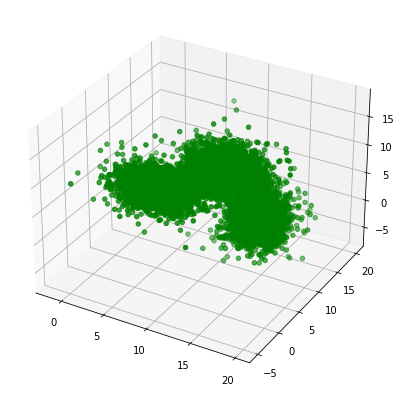

In [37]:
Np=5000 #Amount of particles
from random import randint
k_kappa_min=4
k_kappa_max=7       #k_kappa=2 for kappa distribution - k_kappa=200 for full gaussian
NC=4                    #Amount of clusters
v0x=15*np.random.rand(NC) #change value in front of random array to change the shift in that direction
v0y=15*np.random.rand(NC)
v0z=15*np.random.rand(NC)
vpkx=[]
vpky=[]
vpkz=[]
for ncomp in range(0,NC):
    uth=np.sqrt(2)
    vth=uth
    apar = uth*uth*2.0*(randint(k_kappa_min, k_kappa_max)-1.5)/randint(k_kappa_min, k_kappa_max)
    aperp = vth*vth*2.0*(randint(k_kappa_min, k_kappa_max)-1.5)/randint(k_kappa_min, k_kappa_max)
    theta = 2.0 * np.pi * np.random.rand(Np)
    vpar=np.sqrt(randint(k_kappa_min, k_kappa_max)*apar*(pow(np.random.rand(Np),(-1.0/(randint(k_kappa_min, k_kappa_max)-0.5)))-1.0))*np.cos(theta)
    vperp=np.sqrt(randint(k_kappa_min, k_kappa_max)*aperp*(1.0+vpar*vpar/(randint(k_kappa_min, k_kappa_max)*apar+1e-10))*(pow((1.0-np.random.rand(Np)),(-1.0/randint(k_kappa_min, k_kappa_max)))-1.0))

    theta = 2*np.pi*np.random.rand(Np)
    vpkx2=v0x[ncomp]+vpar
    vpky2=v0y[ncomp]+vperp * np.cos(theta)
    vpkz2=v0z[ncomp]+vperp * np.sin(theta)
    
    vpkx.append(vpkx2)
    vpky.append(vpky2)
    vpkz.append(vpkz2)
    
    

vpkx = list(np.concatenate(vpkx). flat)
vpky = list(np.concatenate(vpky). flat)
vpkz = list(np.concatenate(vpkz). flat)   
Xdata=np.array([vpkx,vpky,vpkz])

Xdata=np.conjugate(Xdata).T  
print(Xdata.shape)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(Xdata[:,0], Xdata[:,1], Xdata[:,2], color = "green")

 
# show plot
plt.show()

GMM silhouette and CH score (slow)

GMM BIC (fast)

In [14]:
import dask_ml.cluster
fig.clear()


Sil_Score=[]
CH_score=[]
clusters=list(range(2,10))

for i in range(2,10):
    dask_ml.cluster.SpectralClustering(n_clusters=i, n_components=100).fit(Xdata)
    Sil_Score.append(sklearn.metrics.silhouette_score(Xdata,clustering.labels_))
    CH_score.append(sklearn.metrics.calinski_harabasz_score(Xdata,clustering.labels_))
plt.rcParams['figure.figsize'] = [10, 2]    
  
plt.subplot(1, 2, 1)
plt.plot(clusters,Sil_Score,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette-score')


plt.subplot(1, 2, 2) # index 2

plt.plot(clusters,CH_score,'-o','r')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz-score')

IndexError: Too many indices for array

Spectral

112.38173770904541

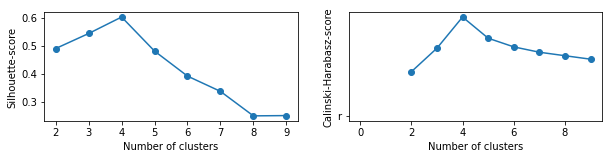

In [38]:
fig.clear()
import time 
from sklearn.cluster import SpectralClustering
t= time.time()
Sil_Score=[]
CH_score=[]
clusters=list(range(2,10))

for i in range(2,10):
    clustering = SpectralClustering(n_clusters=i,
         assign_labels='discretize', 
        random_state=0,affinity='nearest_neighbors',n_jobs=-1).fit(Xdata)
    Sil_Score.append(sklearn.metrics.silhouette_score(Xdata,clustering.labels_))
    CH_score.append(sklearn.metrics.calinski_harabasz_score(Xdata,clustering.labels_))
plt.rcParams['figure.figsize'] = [10, 2]    
  
plt.subplot(1, 2, 1)
plt.plot(clusters,Sil_Score,'-o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette-score')


plt.subplot(1, 2, 2) # index 2

plt.plot(clusters,CH_score,'-o','r')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz-score')
elapsed=time.time()-t
elapsed

Bayesian GMM

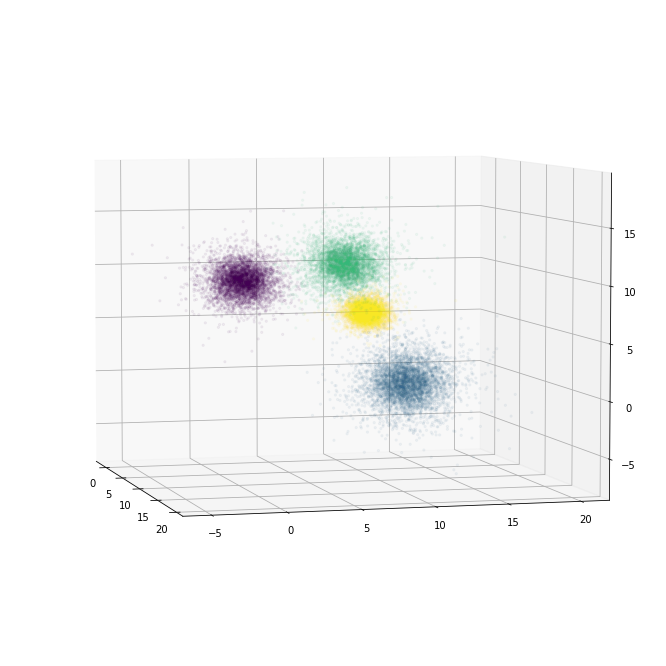

In [39]:
fig.clear()

clustering = SpectralClustering(n_clusters=4,
         assign_labels='discretize', 
        random_state=0,affinity='nearest_neighbors',n_jobs=-1).fit(Xdata)



fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(vpkx,vpky,vpkz,marker='.', c=clustering.labels_,alpha=0.05)


#for i in range(0,best_gmm.n_components):
   # ax.plot(gmm_centers[i,0],gmm_centers[i,1],gmm_centers[i,2],'o', color='red',markersize='10')

for angle in range(0, 360, 15):
    ax.view_init(5, angle)
    display(fig)
    clear_output(wait = True)
    plt.pause(0.1)

In [16]:
from sklearn.datasets import make_circles
from sklearn.utils import shuffle
import pandas as pd

from timeit import default_timer as tic
import sklearn.cluster
import dask_ml.cluster
import seaborn as sns

Ns = [2500, 5000, 7500, 10000]
X, y = make_circles(n_samples=10_000, noise=0.05, random_state=0, factor=0.5)
X, y = shuffle(X, y)

timings = []
for n in Ns:
    X, y = make_circles(n_samples=n, random_state=n, noise=0.5, factor=0.5)
    t1 = tic()
    sklearn.cluster.SpectralClustering(n_clusters=2).fit(X)
    timings.append(('Scikit-Learn (exact)', n, tic() - t1))
    t1 = tic()
    dask_ml.cluster.SpectralClustering(n_clusters=2).fit(X)
    timings.append(('dask-ml (approximate)', n, tic() - t1))


df = pd.DataFrame(timings, columns=['method', 'Number of Samples', 'Fit Time'])
sns.factorplot(x='Number of Samples', y='Fit Time', hue='method',
               data=df, aspect=1.5)

IndexError: Too many indices for array